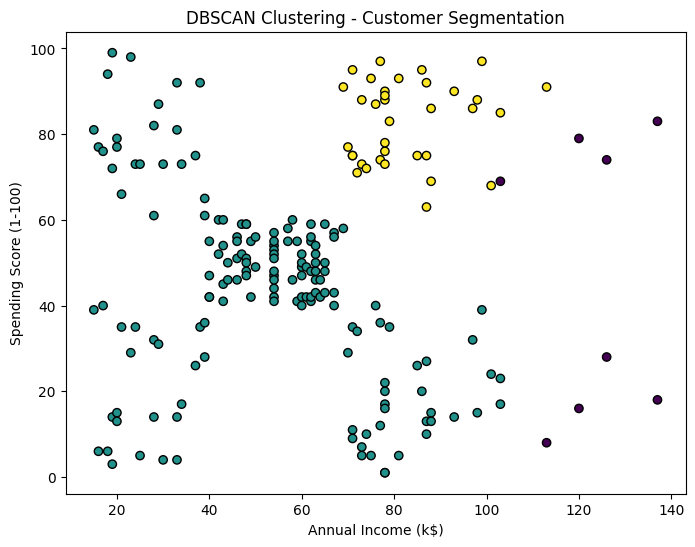

Silhouette Score (excluding noise): 0.388


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

# Load dataset directly from GitHub
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)

# Selecting relevant features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardizing data for DBSCAN
X_scaled = StandardScaler().fit_transform(X)

# Running DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Adding clusters to dataset
df['Cluster'] = clusters

# Visualizing Clusters
plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='viridis', edgecolors='k')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clustering - Customer Segmentation")
plt.show()

# --- Silhouette Evaluation ---
# Exclude noise points (-1) for evaluation
mask = df['Cluster'] != -1
if len(set(df.loc[mask, 'Cluster'])) > 1:
    sil_score = silhouette_score(X_scaled[mask], df.loc[mask, 'Cluster'])
    print(f"Silhouette Score (excluding noise): {sil_score:.3f}")
else:
    print("Silhouette score cannot be computed: only one cluster or all noise points.")
